<a href="https://colab.research.google.com/github/Fahdlabba/FakeNEwsDetector/blob/main/FakeNewsDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d saurabhshahane/fake-news-classification

fake-news-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset="/content/fake-news-classification.zip"
with ZipFile(dataset,"r") as zip : 
  zip.extractall()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
df=pd.read_csv("/content/WELFake_Dataset.csv")
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [ ]:
df.shape

(72134, 4)

In [ ]:
df.dropna(how='any',inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
X=df.drop(columns=["Unnamed: 0","text","label"])
Y=df["label"]

In [ ]:
X.shape

(71537, 1)

In [ ]:
port_stem=PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_content=re.sub('[^a-zA-Z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english') ]
  stemmed_content=' '.join(stemmed_content)
  return stemmed_content

In [ ]:
X["title"]=X["title"].apply(stemming)

In [ ]:
Y

0        1
2        1
3        0
4        1
5        1
        ..
72129    0
72130    1
72131    0
72132    0
72133    1
Name: label, Length: 71537, dtype: int64

In [ ]:
vectorize=TfidfVectorizer()

In [ ]:
X=X["title"].values
Y=Y.values

In [ ]:
X

array(['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video',
       'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video',
       'bobbi jindal rais hindu use stori christian convers woo evangel potenti bid',
       ..., 'migrant refus leav train refuge camp hungari',
       'trump tussl give unpopular mexican leader much need shot arm',
       'goldman sach endors hillari clinton presid'], dtype=object)

In [ ]:
Y

array([1, 1, 0, ..., 0, 0, 1])

In [ ]:
X=vectorize.fit_transform(X)

In [ ]:
print(X)

  (0, 18504)	0.12953081995001134
  (0, 17122)	0.24861338779858738
  (0, 6667)	0.4856722738685227
  (0, 1780)	0.334723411455833
  (0, 18956)	0.19119199199155718
  (0, 3641)	0.24869119486730346
  (0, 17225)	0.25417143325832803
  (0, 6364)	0.2892696681391208
  (0, 403)	0.3194027206998875
  (0, 7816)	0.2673841297708583
  (0, 5456)	0.31817689197461024
  (0, 9620)	0.2281779531036376
  (1, 2645)	0.30813559018672815
  (1, 11768)	0.22306828908813509
  (1, 16311)	0.19986765438141044
  (1, 7949)	0.2692164819805331
  (1, 13485)	0.22680875608494216
  (1, 12644)	0.2790489798405971
  (1, 14473)	0.3581071132976847
  (1, 2890)	0.3640735779949492
  (1, 14973)	0.16084309863008028
  (1, 6815)	0.26521109680009336
  (1, 1038)	0.284047507371272
  (1, 11914)	0.1686662338838085
  (1, 17891)	0.3597305755021129
  :	:
  (71533, 18786)	0.2528727731187659
  (71533, 17635)	0.13198736334480252
  (71534, 8133)	0.46276693634945776
  (71534, 2539)	0.39672254078433306
  (71534, 14075)	0.35335720051740843
  (71534, 14071)

<Axes: xlabel='label', ylabel='count'>

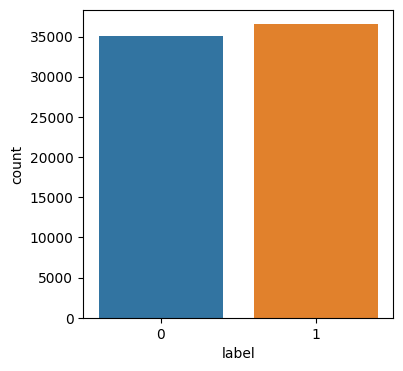

In [ ]:
fig=plt.figure(figsize=(4,4))
sns.countplot(x=df["label"],data=df)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix , accuracy_score

#Logistic Regression 

In [ ]:
model =LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_hat=model.predict(X_train)

In [ ]:
cnf_mat=confusion_matrix(Y_train,y_hat)

<Axes: >

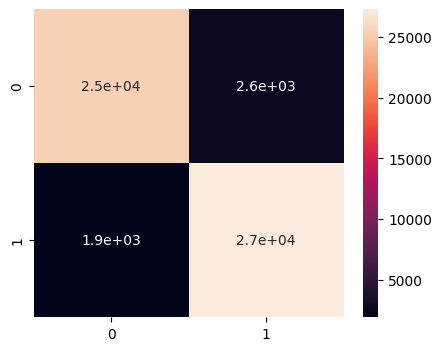

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cnf_mat ,annot=True)

In [ ]:
print(accuracy_score(Y_train ,y_hat))

0.9208967481521606


In [ ]:
y_hatTest=model.predict(X_test)

<Axes: >

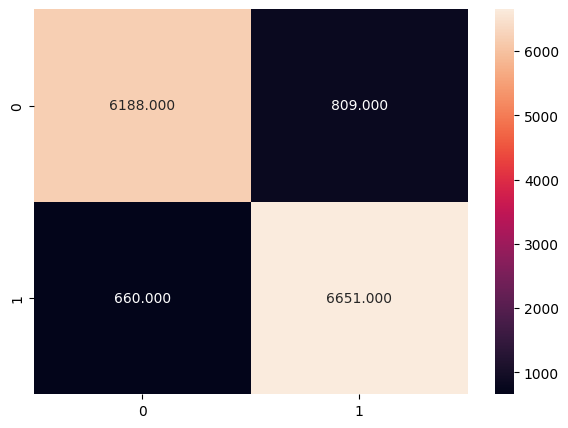

In [ ]:
cnf_mat=confusion_matrix(Y_test,y_hatTest)
plt.figure(figsize=(7,5))
sns.heatmap(cnf_mat,annot=True ,fmt='0.3f')


In [ ]:
print(accuracy_score(Y_test,y_hatTest))

0.8973301649426894
